# Part 1: Annotations

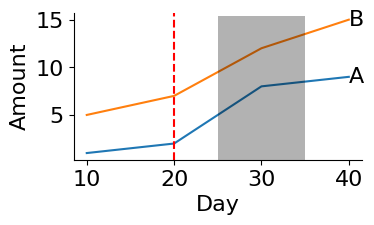

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(figsize=(4,2.5), legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Amount")
plt.tight_layout()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. text on the right instead of legend
for col in df.columns:
    txt = ax.text(df.index[-1], df[col].iat[-1], col, ha="left", va="center")

# 2. vertical line (point in time)
p = plt.Line2D((20,20), ax.get_ylim(), color="r", linestyle="--")
ax.add_artist(p)

# # for fun: bottom left to top right
# p = plt.Line2D((0,1), (0,1), color="r", linestyle="--", transform=ax.transAxes)
# ax.add_artist(p)

# 3. highlighted region (range of time) -- 25 to 35
p = plt.Rectangle((25,0), 10, ax.get_ylim()[1] - ax.get_ylim()[0], color="k", zorder=10, alpha=0.3, linewidth=0)
ax.add_artist(p)

# Part 2: Geographic Maps

In [55]:
import pandas as pd
import geopandas as gpd

In [57]:
# .shp file is a Shapefile
gpd.datasets.get_path("naturalearth_lowres")

'/home/trh/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [59]:
!ls /home/trh/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [60]:
!ls /home/trh/.local/lib/python3.10/site-packages/geopandas/datasets/

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [71]:
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path).set_index("name")

In [72]:
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [64]:
type(df).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [67]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673841980285, 33.73972000000009 -9.4171

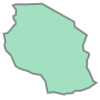

In [70]:
print(df["geometry"].iat[1])
df["geometry"].iat[1]

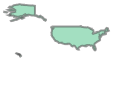

In [74]:
df.at["United States of America", "geometry"]

In [75]:
print(type(df.at["United States of America", "geometry"]))
print(type(df.at["Tanzania", "geometry"]))

<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>


<AxesSubplot:>

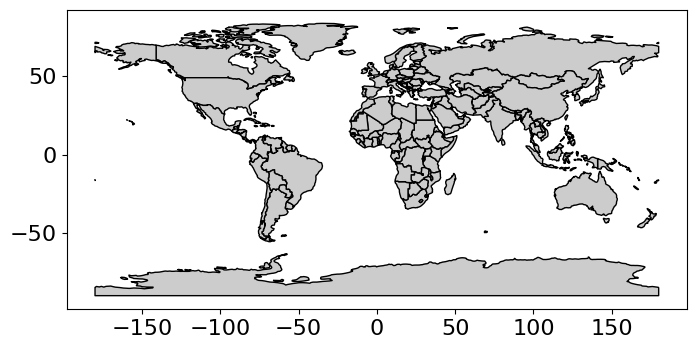

In [81]:
df.plot(figsize=(8,8), facecolor="0.8", edgecolor="k")

<AxesSubplot:>

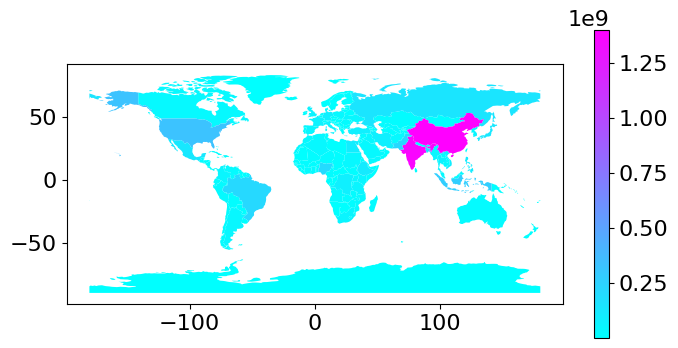

In [87]:
df.plot(figsize=(8,4), column="pop_est", legend=True, cmap="cool")

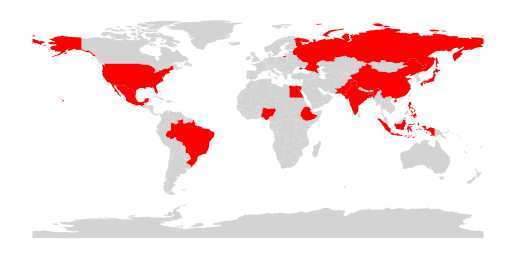

In [97]:
# countries with >100M will be red, others will be gray
df["color"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "color"] = "red"
ax = df.plot(color=df["color"])
ax.set_axis_off()

In [98]:
from shapely.geometry import Point, Polygon, box

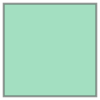

In [108]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])
p2 = box(0,0,1,1)
p3 = Point(5,5)
p4 = p3.buffer(1)
p2

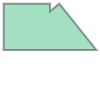

In [109]:
p1.union(p2)  # means OR

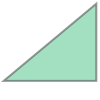

In [111]:
p1.intersection(p2)  # means AND

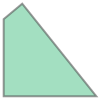

In [112]:
p1.difference(p2)  # means SUBTRACT

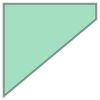

In [113]:
p2.difference(p1)  # means SUBTRACT

In [115]:
# crop down to just see Europe
b = box(-10.67,34.5,31.55,71.05)
#df.plot()

In [118]:
# attept 1
# df[df.intersects(b)].plot()

<AxesSubplot:>

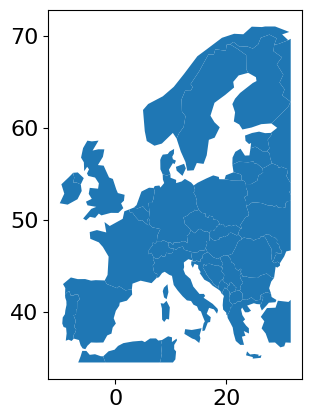

In [121]:
eur1 = df.intersection(b)
eur1.plot()

<AxesSubplot:>

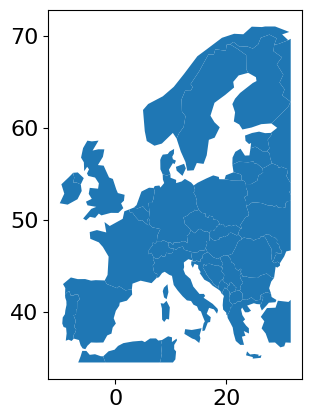

In [125]:
eur2 = eur1[~eur1.is_empty]
eur2.plot()